# Redução de dimensionalidade

Ou seja, aprender a diminuir o número de entradas para os modelos de machine learning, e assim utilizar menos poder computacional.


O modelo principal usado neste notebook é PCA (**principal component anaylis / análise dos componentes principais**), um outro modelo similar é o (**truncated SVD / truncated singular value decomposition** - decomposição truncada de valores singulares).

## Reduzindo dimensionalidades com PCA

Hora de levar a matemática para um outro nível, utilizando algebra linear para reduzir as dimensões.

Há muitos outros métodos de decomposição, que veremos em outros notebooks.

In [1]:
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [2]:
iris =  datasets.load_iris()
iris_X = iris.data
y = iris.target

## Como fazer

1. Importar o módulo de decomposiçao

In [3]:
from sklearn import decomposition

2. instanciar o objeto padrão PCA

In [4]:
pca = decomposition.PCA()
pca

PCA()

3. transformar o dados utilizando o método `fit_transform`

In [5]:
iris_pca = pca.fit_transform(iris_X)
iris_pca[:5]

array([[-2.68412563e+00,  3.19397247e-01, -2.79148276e-02,
        -2.26243707e-03],
       [-2.71414169e+00, -1.77001225e-01, -2.10464272e-01,
        -9.90265503e-02],
       [-2.88899057e+00, -1.44949426e-01,  1.79002563e-02,
        -1.99683897e-02],
       [-2.74534286e+00, -3.18298979e-01,  3.15593736e-02,
         7.55758166e-02],
       [-2.72871654e+00,  3.26754513e-01,  9.00792406e-02,
         6.12585926e-02]])

4. Agora que o objeto PCA foi ajustado, use o `explained_variance_ratio`.

In [6]:
pca.explained_variance_ratio_

array([0.92461872, 0.05306648, 0.01710261, 0.00521218])

In [7]:
pca.explained_variance_ratio_.sum()

1.0

## Como funciona

O PCA encontra o conjunto de vectores ortogonais que representam os dados da matriz original. O PCA trabalha em mapear o conjunto de dados original em novos espações vetoriais, onde os novos vetores das colunas da matriz são ortogonais.

Conjunto de dados de grandes dimensões podem se tornar um problema,  podem sobreajustar valores, por isso é preferível utilizar menos dimensões.

In [8]:
pca = decomposition.PCA(n_components=2)
iris_X_prime = pca.fit_transform(iris_X)
iris_X_prime.shape

(150, 2)

In [9]:
iris_pca.shape

(150, 4)

A matriz agora é de Nx2 ao ínves de Nx4.

In [10]:
pca.explained_variance_ratio_.sum()

0.977685206318795

Para visualizar o que o PCA fez, plotar  as duas dimensões de conjunto de dados do "iris" com o figuras antes-depois da transformação.

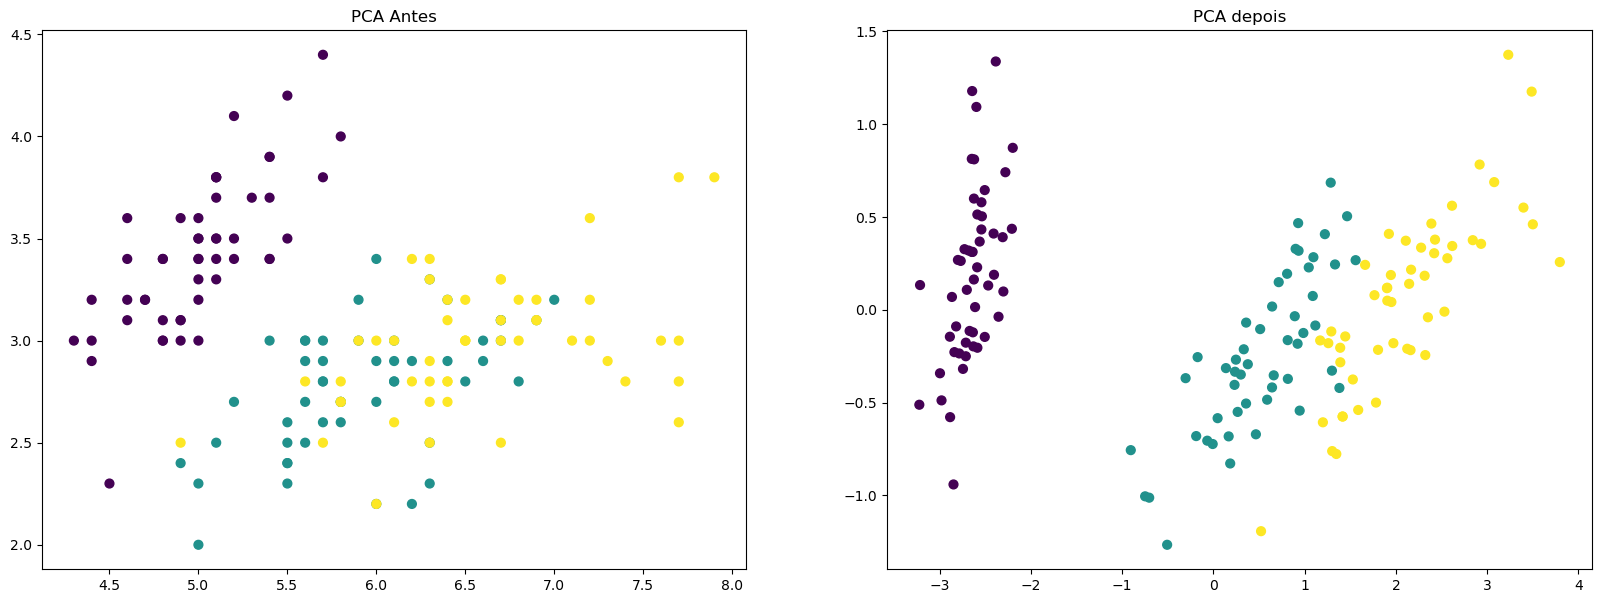

In [11]:
fig = plt.figure(figsize=(20,7))
ax = fig.add_subplot(121)
ax.scatter(iris_X[: ,0], iris_X[:,1], c=y, s=40)
ax.set_title("PCA Antes")

ax2 = fig.add_subplot(122)
ax2.scatter(iris_X_prime[:,0], iris_X_prime[:,1], c=y , s=40)
ax2.set_title("PCA depois")
plt.show()

Parar explicar pelo menos 98 percento do desvio, o objeto PCA será criado da seguinte forma:

In [12]:
pca = decomposition.PCA(n_components=.98)
iris_x_prime = pca.fit(iris_X).transform(iris_X)
pca.explained_variance_ratio_.sum()

0.9947878161267247

## Há mais

É recomendado que o PCA seja escalonado previamente, da seguinte forma:

In [13]:
from sklearn import preprocessing

In [14]:
iris_X_scaled = preprocessing.scale(iris_X)
pca = decomposition.PCA(n_components=2)
iris_X_scaled = pca.fit_transform(iris_X_scaled)

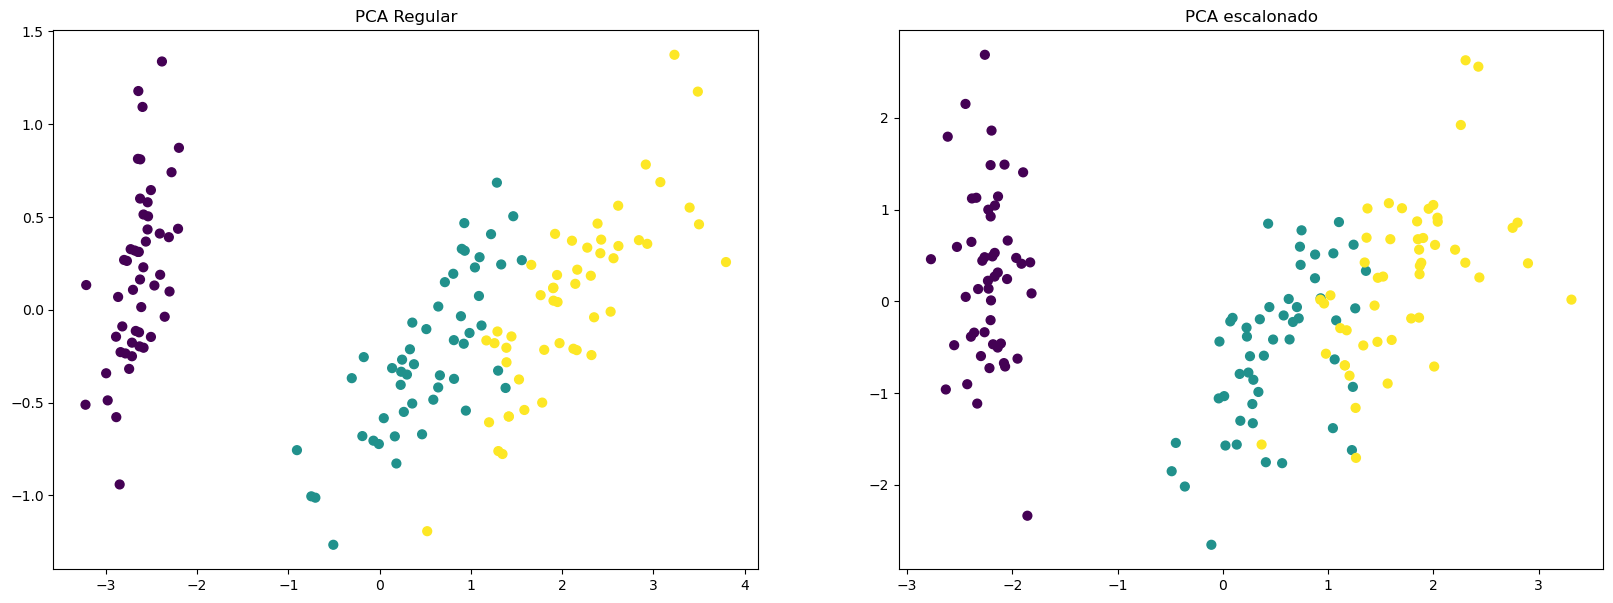

In [15]:
# gráfico
fig = plt.figure(figsize=(20,7))
ax = fig.add_subplot(121)
ax.scatter(iris_X_prime[:,0], iris_X_prime[:,1], c=y, s=40)
ax.set_title("PCA Regular")

ax2 = fig.add_subplot(122)
ax2.scatter(iris_X_scaled[:,0], iris_X_scaled[:,1], c=y, s=40)
ax2.set_title("PCA escalonado")
plt.show()

Para um pouco ruim, mas indiferente o PCA escalonado tem um diferencial, pode ser utilizado em pipeline

In [16]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [17]:
pipe = Pipeline([('scaler', StandardScaler()), ("pca", decomposition.PCA(n_components=2))])
iris_X_scaled = pipe.fit_transform(iris_X)

Utilizando pipelines, evita erros e reduz a quantidade de debugging no código complexo.

## Análise de factores para decomposição

Está é uma outra técnica de reduzir a dimensionalidade, similar o PCA.
Para comparar PCA e a análise de factores, será usado o conjunto de dados das flores "iris"...

In [18]:
from sklearn import datasets
iris = datasets.load_iris()
iris_X = iris.data
from sklearn.decomposition import FactorAnalysis

## Como fazer
Simimlar ao PCA

In [19]:
fa = FactorAnalysis(n_components=2)
iris_two_dim = fa.fit_transform(iris_X)
iris_two_dim[:5]

array([[-1.32761727, -0.56131076],
       [-1.33763854, -0.00279765],
       [-1.40281483,  0.30634949],
       [-1.30104274,  0.71882683],
       [-1.33342439, -0.36458899]])

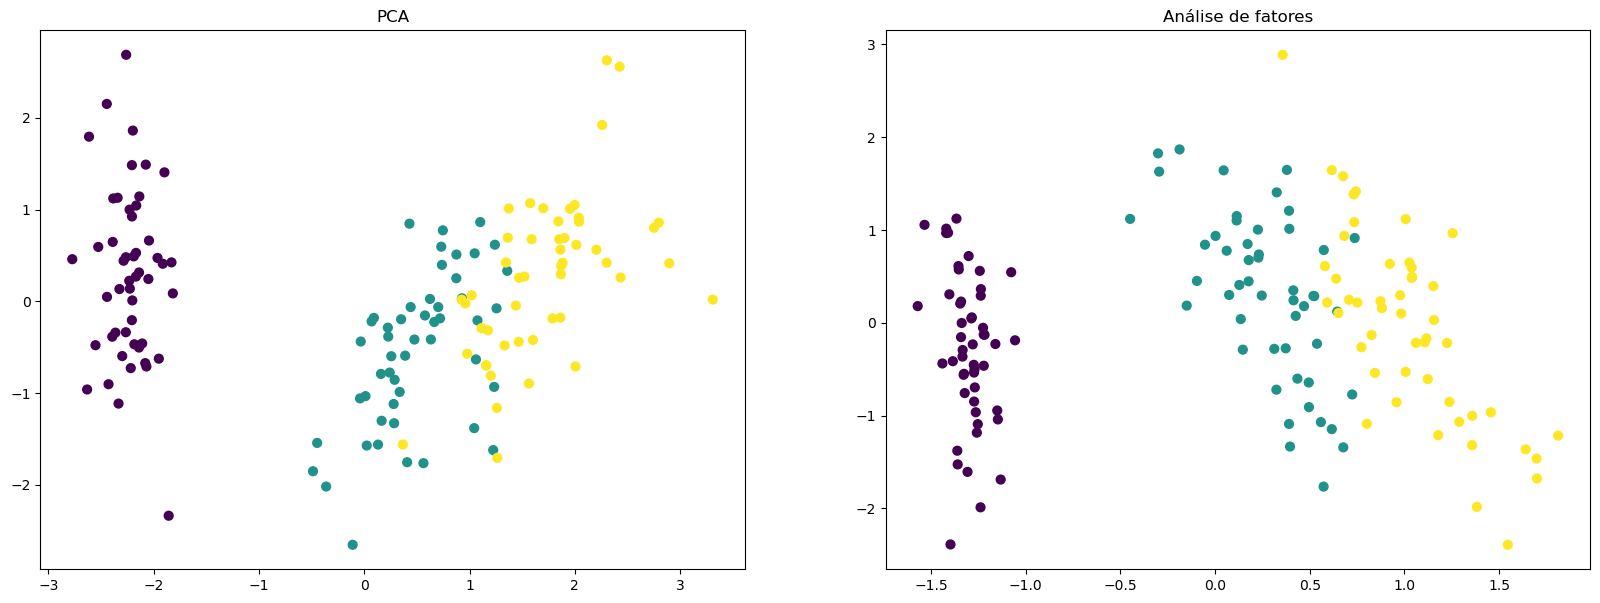

In [20]:
# gráfico
fig = plt.figure(figsize=(20,7))
ax = fig.add_subplot(121)
ax.scatter(iris_X_scaled[:,0], iris_X_scaled[:,1], c=y, s=40)
ax.set_title("PCA")

ax2 = fig.add_subplot(122)
ax2.scatter(iris_two_dim[:,0], iris_two_dim[:,1], c=y, s=40)
ax2.set_title("Análise de fatores")
plt.show()

Análise de factores é similar to PCA, mas há uma diferença importante. PCA é uma transformação linear dos dados para um espaço diferente, onde o primeiro componente explica a variância dos dados, e cada componente sequencial é ortogonal ao primeiro componente. Imagina que PCA pega conjunto de dados de N dimensões e vai descendo para um espaço de M dimensões, onde M < N

Para Análise de factores funciona como se só tivesse um espaço com M dimensões e uma combinação linear que cria um conjunto de dados em N dimensões.

## Usando Kernel PCA para redução de dimensão não linear

Tudo seria mais fácil se os dados sempre fosse linearmente separável, mas não são. Kernel PCA ajuda para lidar com isso. Dados são passam pela função Kernel PCA que projeta os dados num espaço diferente, para depois entrar em ação o PCA.

In [21]:
from sklearn import datasets, decomposition
iris = datasets.load_iris()
iris_X = iris.data

## Como fazer

O cosseno do kernel funciona comparando os ângulos entre dois exemplos representados em um espaço. O cosseno entre dois vetores é dado pela seguinte fórmula:

$$\cos(\theta) = \frac{A \cdot B}{\lVert A\rVert \lVert B \rVert}$$

O que indica que o cosseno entre A e B é o produto entre dois vetores normalizado por o produto das normas individuais.

In [22]:
kpca =  decomposition.KernelPCA(kernel="cosine", n_components=2)

In [23]:
iris_X_prime = kpca.fit_transform(iris_X)

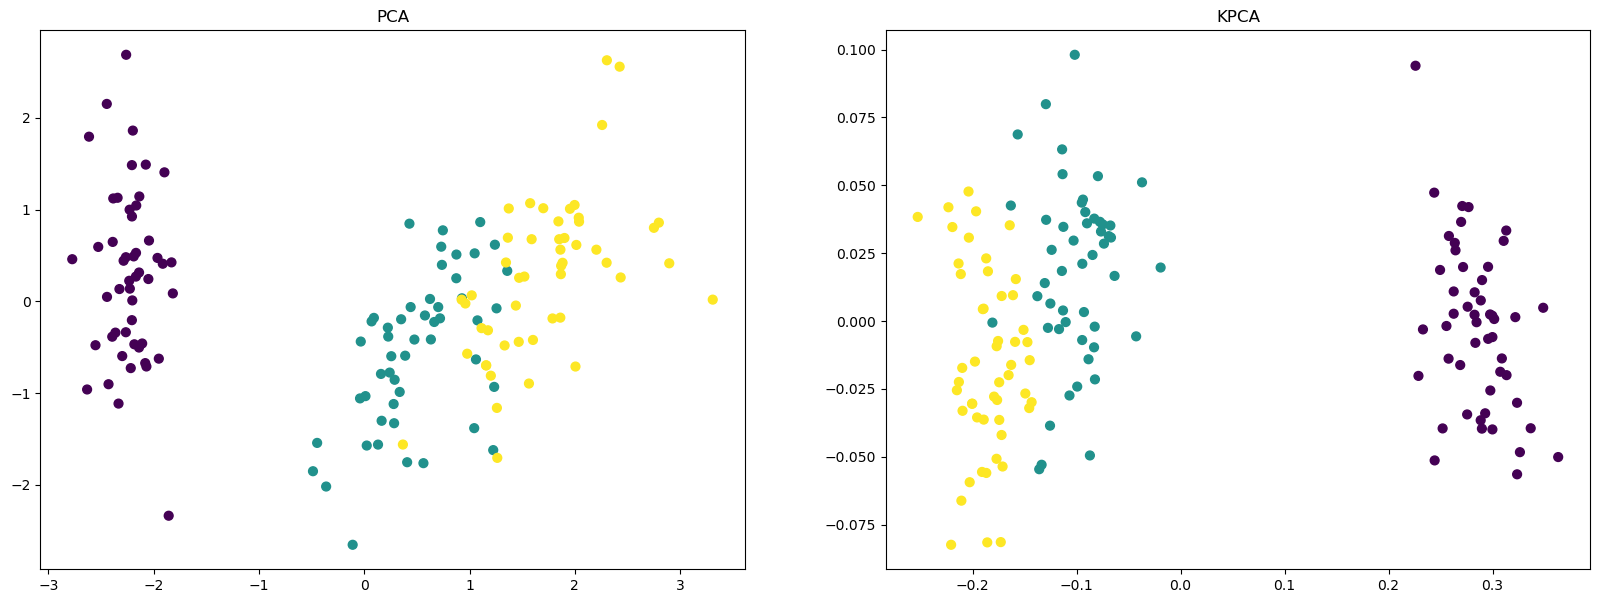

In [24]:
# gráfico
fig = plt.figure(figsize=(20,7))
ax = fig.add_subplot(121)
ax.scatter(iris_X_scaled[:,0], iris_X_scaled[:,1], c=y, s=40)
ax.set_title("PCA")

ax2 = fig.add_subplot(122)
ax2.scatter(iris_X_prime[:,0], iris_X_prime[:,1], c=y, s=40)
ax2.set_title("KPCA")
plt.show()

## Como funciona

Há outros tipos de kernel, e você também pode escrever sua própria função

- Poly(polynomial)
- RBF(radial basis function)
- Sigmoid
- Cosine
- Pre-computed

## Usando o trancamento SVD para reduzir dimensionalidade

SVD truncado é uma técnica de factorização de matrizes, é bem similar ao PCA, exceto que a fatorização do SVD é feita nos dados da Matriz, enquanto o PCA, a factorização é feita sob a matriz de covariância. Típicamente o SVD é usado para encontrar por baixo dos panos os principais componentes de uma matriz.

In [25]:
from sklearn.datasets import load_iris
iris = load_iris()
iris_x = iris.data
y = iris.target

In [26]:
from sklearn.decomposition import TruncatedSVD


In [27]:
svd = TruncatedSVD(2)
iris_transformed = svd.fit_transform(iris_x)

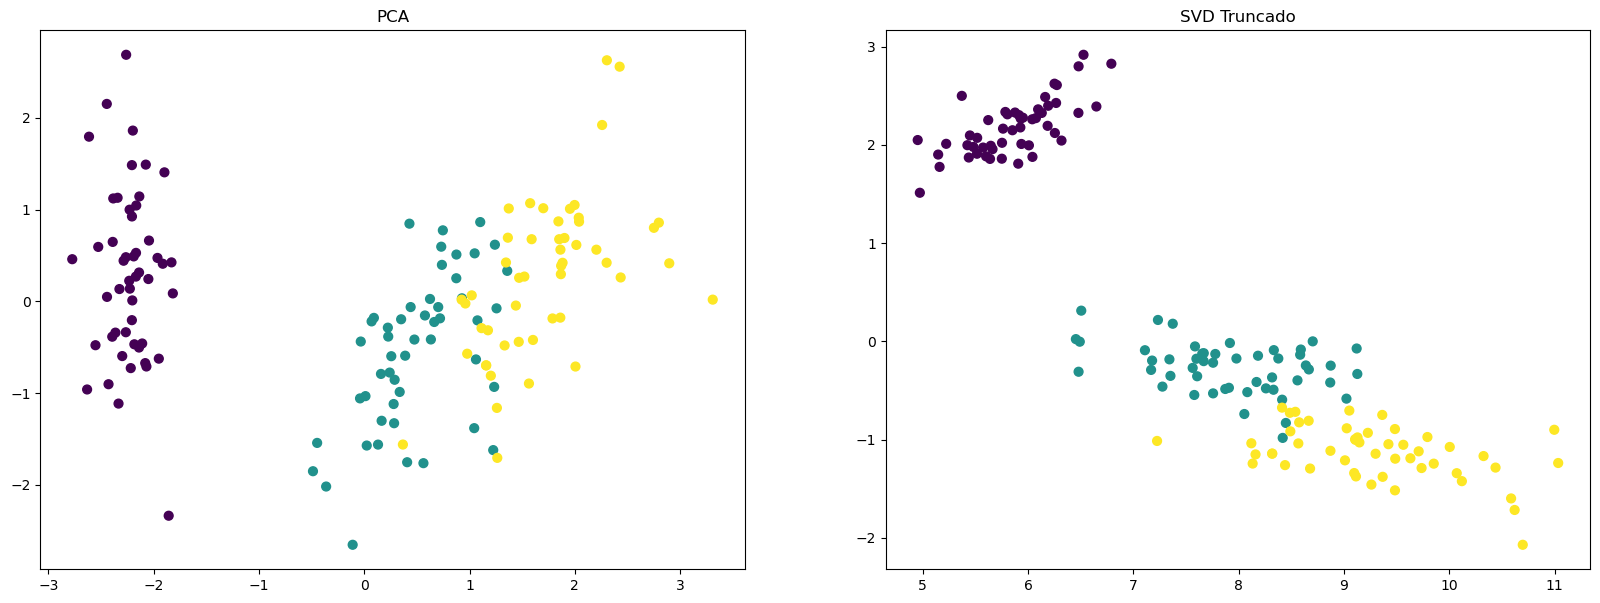

In [28]:
# gráfico
fig = plt.figure(figsize=(20,7))
ax = fig.add_subplot(121)
ax.scatter(iris_X_scaled[:,0], iris_X_scaled[:,1], c=y, s=40)
ax.set_title("PCA")

ax2 = fig.add_subplot(122)
ax2.scatter(iris_transformed[:,0], iris_transformed[:,1], c=y, s=40)
ax2.set_title("SVD Truncado")
plt.show()

In [29]:
svd.explained_variance_ratio_

array([0.52875361, 0.44845576])

In [30]:
svd.explained_variance_ratio_.sum()

0.9772093692426489

## Como funciona

Foi feito com scikit learn, mas agora podemos fazer com SciPy

In [31]:
from scipy.linalg import svd
import numpy as np

In [33]:
D = np.array([[1,2],[1,3],[1,4]])
D

array([[1, 2],
       [1, 3],
       [1, 4]])

In [34]:
U,S,V = svd(D, full_matrices=False)

In [35]:
U.shape, S.shape, V.shape

((3, 2), (2,), (2, 2))

In [39]:
# mostrar como estão as matrizes decompostas
U, S , V

(array([[-0.39133557,  0.8247362 ],
        [-0.5605708 ,  0.13817999],
        [-0.72980603, -0.54837623]]),
 array([5.64015854, 0.43429448]),
 array([[-0.29816758, -0.95451354],
        [ 0.95451354, -0.29816758]]))

Agora vamos reconstruir a matriz original D para confimar U,S e V como decomposição.

In [40]:
np.dot(U.dot(np.diag(S)),V)

array([[1., 2.],
       [1., 3.],
       [1., 4.]])

## Inversão de sinal
Dependendo do estado  gerador de números aleatórios, ao fazer ajustes seguidos no SVD truncado,este pode mudar o sinal na saída, e para evitar isso, é aconselhavel ajustar o SVD truncado uma vez só, e depois fazer a transformação de ai em diante.


In [53]:
tsvd = TruncatedSVD(2)
#tsvd.fit(iris_x)
#tsvd.transform(iris_x)

## Matriz esparsa

Uma vantagem do SVD truncado sobre o PCA é que o SVD pode operar em matrizes esparsas, enquanto o PCA não pode, isto devido ao fato de que a covariância da matriz tenha que ser computada pelo PCA, o que requer operar na matriz inteira.

## Usando decomposição para classificar DictionaryLearning

`DictionaryLearning` tenta pegar o conjunto de dados e transformá-lo numa representação esparsa.

In [54]:
from sklearn.datasets import load_iris
iris = load_iris()
iris_X = iris.data
y = iris.target

Criar um conjunto de treinamento pegando um elemento sim outro não do conjunto `iris_X` e `y`. Pegar o que sobrar para teste.

In [55]:
X_train = iris_X[::2]
X_test = iris_X[1::2]
y_train = y[::2]
y_test = y[1::2]

In [73]:
# para saber quantos zeros tem no conjunto (como exemplo)
(y_train.astype(int)==0).sum()

25